<a href="https://colab.research.google.com/github/NINJAHATTORI004/csi/blob/main/project1_Anomaly_detection_in_network_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
galaxyh_kdd_cup_1999_data_path = kagglehub.dataset_download('galaxyh/kdd-cup-1999-data')

print('Data source import complete.')


100%|██████████| 87.8M/87.8M [00:01<00:00, 83.0MB/s]

Extracting files...


Data source import complete.


In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Import Libraries**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

**Data Loading**

In [3]:
data_path = '/content/corrected' #Specifies the path to the dataset.

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]


df = pd.read_csv(data_path,names=col_names, index_col=False) #Reads the dataset from the CSV file into a pandas DataFrame df

**Explore Data**

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254.0,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
df.shape

(303644, 42)

In [ ]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


**Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Find Categorical Columns**

In [ ]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('label')


cate_cols

['flag', 'protocol_type', 'service']

**Categorical Features Distribution**

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

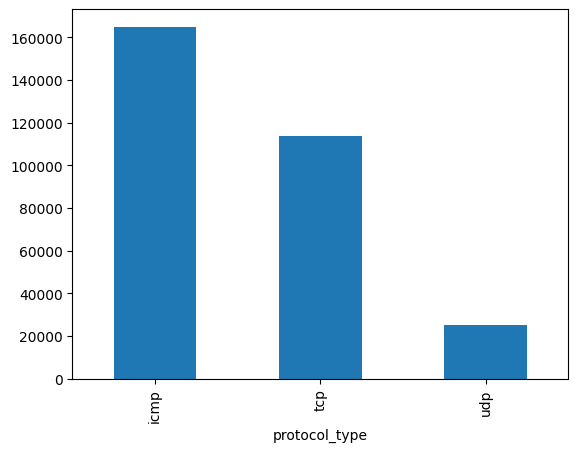

In [ ]:
bar_graph('protocol_type')

ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

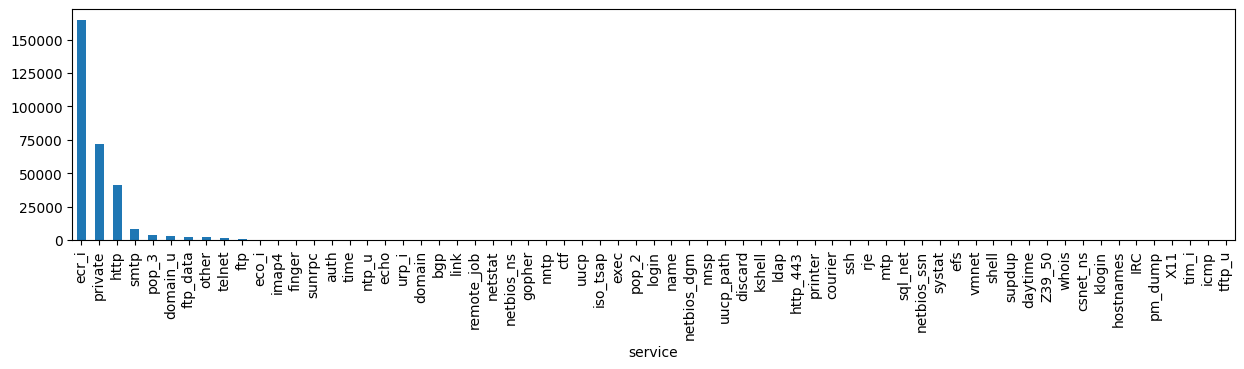

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

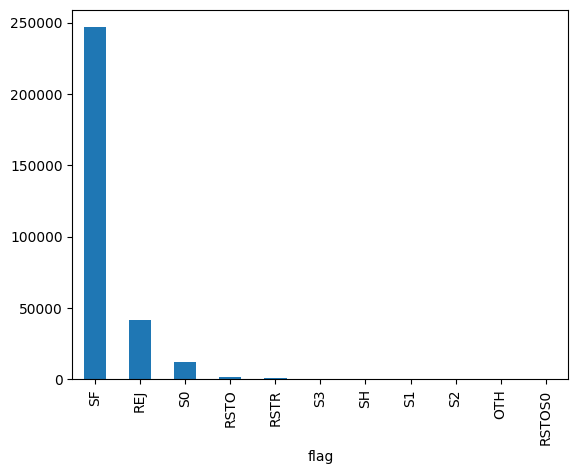

In [ ]:
bar_graph('flag')

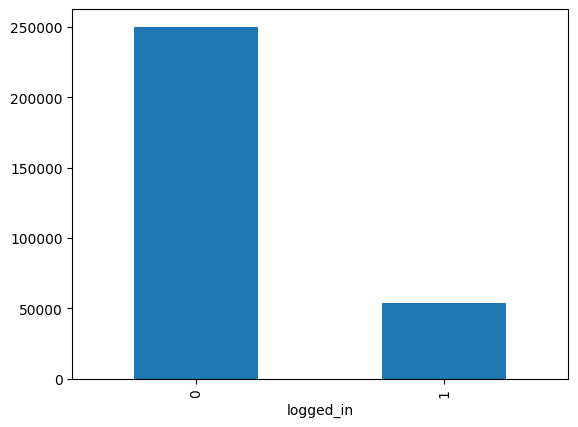

In [ ]:
bar_graph('logged_in')

70000 packets are successfully logged in.

**Target Feature Distribution**

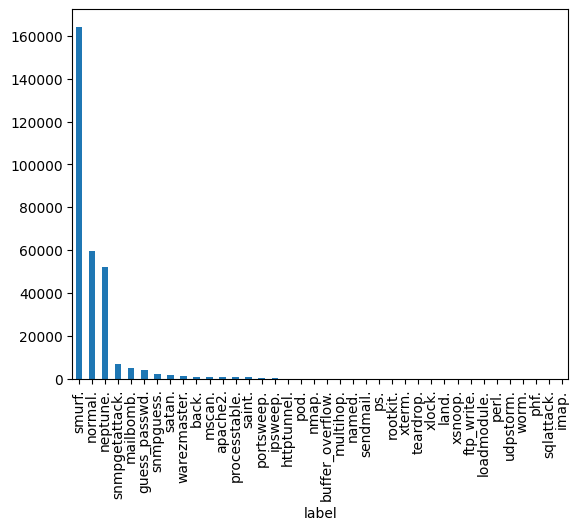

In [ ]:
bar_graph('label')

Imbalanced Dataset: The dataset is heavily imbalanced. Certain attack types, like "smurf" and "neptune," dominate the dataset. These two types are represented by the tallest bars and seem to far outnumber other types of attacks and normal instances.

Minority Classes: Several attack types (like "buffer_overflow", "teardrop", "ipsweep", etc.) have very few instances. These minority classes might be underrepresented, which could pose challenges during model training as the model may not learn to detect these attacks well.

Normal Instances: The number of "normal" instances (shown on the left side) is also quite substantial but significantly smaller than the top attack types (e.g., "smurf" and "neptune").

**Label Encoding Categorical Columns**

In [4]:
label_enc = LabelEncoder()

In [5]:
df['protocol_type'] = label_enc.fit_transform(df['protocol_type'])
df['service'] = label_enc.fit_transform(df['service'])
df['flag'] = label_enc.fit_transform(df['flag'])

In [6]:
#Splitting features and target

X = df.drop(['label'], axis=1)
y = label_enc.fit_transform(df['label'])
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [7]:
label_enc.inverse_transform(np.unique(y))

array(['apache2.', 'buffer_overflow.', 'guess_passwd.', 'ipsweep.',
       'multihop.', 'named.', 'normal.', 'phf.', 'pod.', 'portsweep.',
       'saint.', 'sendmail.', 'smurf.', 'snmpgetattack.', 'udpstorm.',
       'xlock.', 'xsnoop.', nan], dtype=object)

In [8]:
y_binary = np.where(y == 11, 0, 1)

In [9]:
np.unique(y_binary)

array([0, 1])

**Feature Selection**

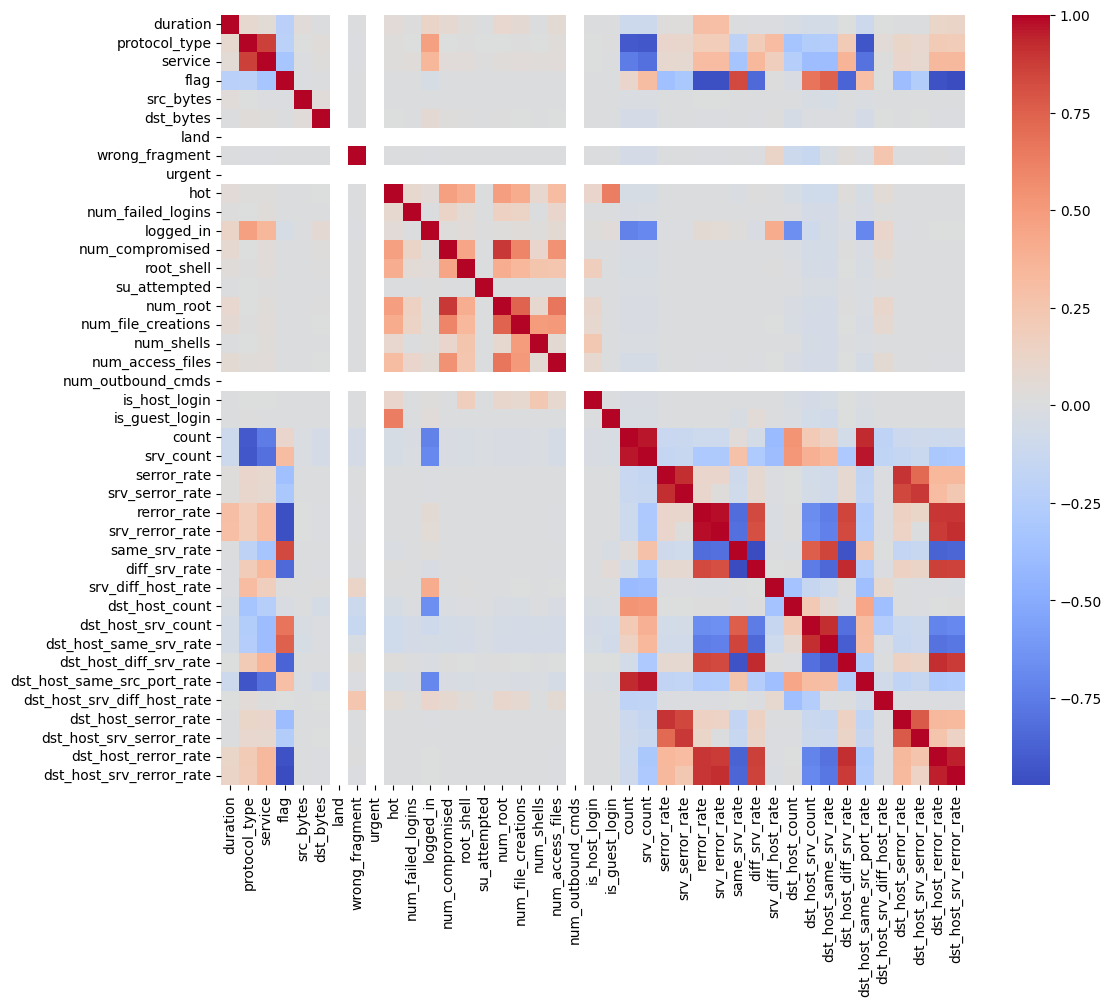

In [10]:
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

Removing highly correlated features (those with values near +1 or -1) and dropping some of them, as they provide redundant information. This can help reduce dimensionality and avoid multicollinearity in the model.

In [11]:
df['num_root'].corr(df['num_compromised'])

np.float64(0.8880437060840994)

In [12]:
df['srv_serror_rate'].corr(df['serror_rate'])

np.float64(0.9213164282056006)

In [13]:
df['srv_count'].corr(df['count'])

np.float64(0.9669323917027696)

In [14]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9783238919038297)

In [15]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

np.float64(0.9162096477411183)

In [16]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

np.float64(0.7738087601380067)

In [17]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

np.float64(0.950688782158142)

In [18]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

np.float64(0.849688598026768)

In [19]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

np.float64(0.7587735824222329)

In [20]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

np.float64(0.9652906643877341)

In [21]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

np.float64(0.9060073355945178)

In [22]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.838825179132045)

In [23]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

np.float64(0.7180870974321144)

In [24]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.8897315504733675)

In [25]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.8974760840813529)

In [26]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.876734741885021)

In [27]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.8974878282199072)

In [28]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.9229049186748796)

In [37]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
# Check if the column exists before attempting to drop
if 'num_root' in df.columns:
    df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
# Check if the column exists before attempting to drop
if 'srv_serror_rate' in df.columns:
    df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
# Check if the column exists before attempting to drop
if 'srv_rerror_rate' in df.columns:
    df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
# Check if the column exists before attempting to drop
if 'dst_host_srv_serror_rate' in df.columns:
    df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
# Check if the column exists before attempting to drop
if 'dst_host_serror_rate' in df.columns:
    df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
# Check if the column exists before attempting to drop
if 'dst_host_rerror_rate' in df.columns:
    df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
# Check if the column exists before attempting to drop
if 'dst_host_srv_rerror_rate' in df.columns:
    df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
# Check if the column exists before attempting to drop
if 'dst_host_same_srv_rate' in df.columns:
    df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [38]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
X.shape

(303644, 41)

In [ ]:
X.dtypes

,0
duration,int64
protocol_type,int64
service,int64
flag,int64
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [ ]:
X.shape

(303644, 41)

In [39]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_binary,train_size=1000, random_state=42, stratify=y_binary)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1000, 41)
Test set size: (74488, 41)


In [40]:
# Filter only normal samples for GAN training ( '0' is normal)
X_train_normal = X_train[y_train == 0]
X_train.shape

(1000, 41)

In [ ]:
y_train.shape

(1000,)

**Data Normalisation**

Normalization is important when building a GAN, as it helps improve the training stability and performance of both the generator and discriminator. GANs, especially with architectures that use activation functions like tanh in the generator and sigmoid in the discriminator, benefit from normalized data.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
df_normalized = scaler.fit_transform(X_train)  # Normalize all features

# Convert to a TensorFlow tensor
import tensorflow as tf

df_normalized_tensor = tf.convert_to_tensor(df_normalized, dtype=tf.float32)

In [42]:
def create_tf_dataset(data, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(data)
    dataset = dataset.shuffle(buffer_size=len(data))  # Shuffle the dataset
    dataset = dataset.batch(batch_size)  # Create batches
    return dataset

BATCH_SIZE = 64 # try 64 now
tf_dataset = create_tf_dataset(df_normalized_tensor, BATCH_SIZE)

**Build GAN components**

In [43]:
def build_generator(noise_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(100,)),  # Input shape for noise
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(41, activation='tanh')  # Output layer for 41 features
    ])
    return model

noise_dim = 100  # Dimension of the noise vector
generator = build_generator(noise_dim)

# Test the generator
# Generate a random noise vector
test_noise = tf.random.normal([1, noise_dim])
generated_data = generator(test_noise)
print(generated_data.shape)

(1, 41)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(41,)),  # Adjust input shape if needed
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
    ])
    return model

discriminator = build_discriminator()

In [45]:
from tensorflow.keras.losses import BinaryCrossentropy
cross_entropy = BinaryCrossentropy(from_logits=True)



def generator_loss(fake_output):
    return -tf.reduce_mean(fake_output) # Wasserstein loss

def discriminator_loss(real_output, fake_output):
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-5) #Adjusted learning rate to improve the model
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)

In [46]:
@tf.function
def train_step(real_images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  # Create noise

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

**Train the Model**

In [48]:
history = {'gen': [], 'dis': []}

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:
            gen_loss, dis_loss = train_step(batch)

        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print('Time for epoch {} is {} sec '.format(epoch + 1, time.time() - start))

In [49]:
EPOCHS = 1000  # Set the number of epochs
train(tf_dataset, EPOCHS)

Time for epoch 1 is 6.4242775440216064 sec 
Time for epoch 2 is 0.40853452682495117 sec 
Time for epoch 3 is 0.3761763572692871 sec 
Time for epoch 4 is 0.38759374618530273 sec 
Time for epoch 5 is 0.4086453914642334 sec 
Time for epoch 6 is 0.6910772323608398 sec 
Time for epoch 7 is 0.41940832138061523 sec 
Time for epoch 8 is 0.6790792942047119 sec 
Time for epoch 9 is 0.5879561901092529 sec 
Time for epoch 10 is 0.5935928821563721 sec 
Time for epoch 11 is 0.5675749778747559 sec 
Time for epoch 12 is 0.594271183013916 sec 
Time for epoch 13 is 0.5822157859802246 sec 
Time for epoch 14 is 0.42639636993408203 sec 
Time for epoch 15 is 0.3750877380371094 sec 
Time for epoch 16 is 0.36852049827575684 sec 
Time for epoch 17 is 0.38814425468444824 sec 
Time for epoch 18 is 0.39026856422424316 sec 
Time for epoch 19 is 0.38478779792785645 sec 
Time for epoch 20 is 0.4131300449371338 sec 
Time for epoch 21 is 0.37724947929382324 sec 
Time for epoch 22 is 0.39539027214050293 sec 
Time for e

**Detecting Anomalies**

In [50]:
sample_size = 0.2

X_test_sampled = X_test.sample(frac=sample_size, random_state=42).reset_index(drop=True)
y_test_sampled = y_test[:X_test_sampled.shape[0]]

y_pred=discriminator.predict(X_test_sampled)

466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Model Evaluation**

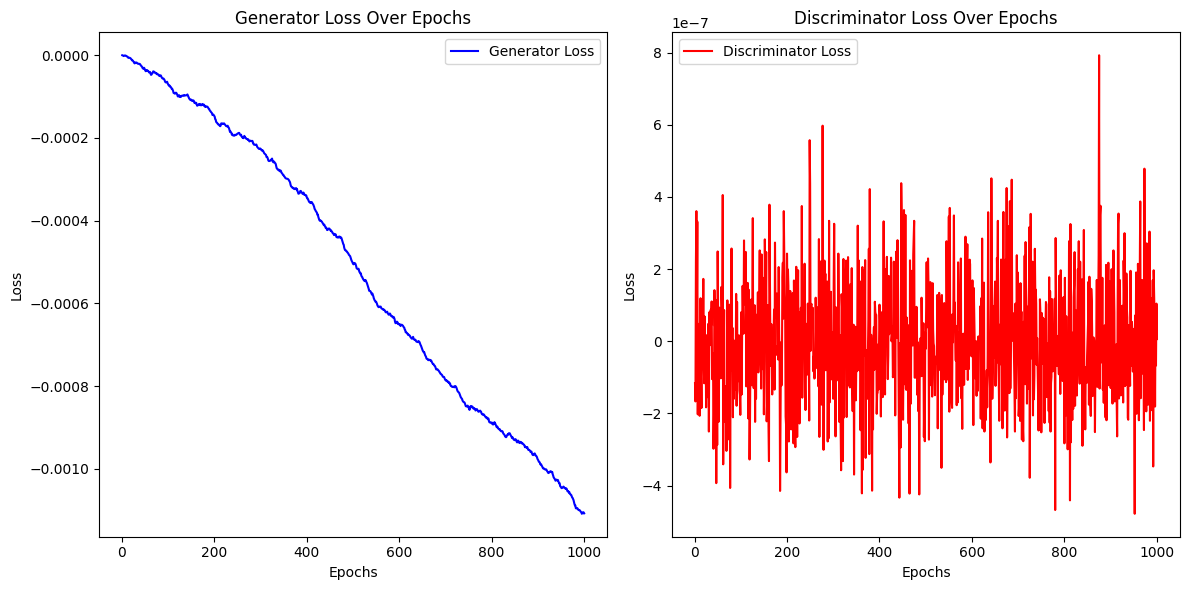

In [51]:
epochs = range(1, len(history['gen']) + 1)

plt.figure(figsize=(12, 6))

# Plot Generator Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history['gen'], label='Generator Loss', color='blue')
plt.title('Generator Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history['dis'], label='Discriminator Loss', color='red')
plt.title('Discriminator Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Find Optimal Threshold**

In [52]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score
prob=[0.2,0.4,0.6,0.8,1.0]
for p in prob:
    pred_value =[1 if i<p  else 0 for i in y_pred]
    f1=f1_score(y_test_sampled,pred_value)
    acc=accuracy_score(y_test_sampled,pred_value)
    precision=average_precision_score(y_test_sampled,pred_value)
    recall= recall_score(y_test_sampled,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =0.2 and f1 score =0.10662769269873547 : accuracy=0.056316284064975165 : precision=0.9998696095779928 : recall=0.0563200644425052
14058 840
prob =0.4 and f1 score =0.10698856416772554 : accuracy=0.05651765337629212 : precision=0.9998696228110425 : recall=0.05652144727126267
14055 843
prob =0.6 and f1 score =0.10698856416772554 : accuracy=0.05651765337629212 : precision=0.9998696228110425 : recall=0.05652144727126267
14055 843
prob =0.8 and f1 score =0.10698856416772554 : accuracy=0.05651765337629212 : precision=0.9998696228110425 : recall=0.05652144727126267
14055 843
prob =1.0 and f1 score =0.10710882408995616 : accuracy=0.056584776480064436 : precision=0.9998696272225084 : recall=0.056588574880848494
14054 844


**Key Observations**

Probabilities: The probabilities being tested range from 0.2 to 1.0. As we increase the threshold, the F1 score slightly improves, but remains low across all thresholds (hovering around 0.119).

F1 Score: The F1 scores are consistently low, indicating a poor balance between precision and recall. Despite slight increases, they are far from optimal values (which typically range from 0 to 1, with 1 being perfect).

Accuracy: The accuracy remains around 0.238, suggesting that approximately 23.8% of predictions are correct. This indicates that the model might be biased toward predicting the negative class due to the low recall.

Precision and Recall:

Precision remains relatively high (around 0.802), suggesting that when the model predicts a positive class, it is correct about 80% of the time.

Recall is extremely low (around 0.064), indicating that the model is failing to identify a significant number of actual positive instances.

Confusion Matrix: Given the counts (e.g., 18522 1239 for probabilities of 0.2): This indicates a strong bias toward the negative class with very few true positives identified.

**Next Steps for Improvement**

**Model Architecture Review:**

Use a sigmoid activation for binary classification.


**Class Imbalance Handling:**

Implement oversampling of the minority class or undersampling of the majority class.

Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples.

**Threshold Optimization:**

Evaluate different thresholds to maximize the F1 score or achieve a desired balance between precision and recall.

**Hyperparameter Tuning:**

Experiment with different hyperparameters (learning rate, batch size, etc.) using techniques like Grid Search or Random Search.

**Regularization Techniques:**

Apply regularization methods (like L1 or L2) to prevent overfitting and improve generalization.

**Experiment with Different Models:**

Consider testing various algorithms (like XGBoost, LightGBM, or neural networks) to find the best fit for data.